In [1]:
import pandas as pd

In [2]:
money = pd.read_excel("usd_exchange_rate.xlsx") # Датафрейм

In [3]:
values = money.curs # Значения курса

In [4]:
past = 7 * 4 # На основе данных за последние 4 недели
future = 7 # будем предсказывать тренд на неделю вперёд

In [5]:
start = past 
end = len(values) - future 

In [6]:
print(start, end)

28 510


In [7]:
raw_df = []
for i in range(start, end):
    # Для каждой строчки (т.е. для каждого дня)
    past_and_future_values = values[(i-past):(i+future)] # Выбирает данные за прошлое и за будущее
    raw_df.append(list(past_and_future_values))

In [8]:
past_columns = [f"past_{i}" for i in range(past)] # Названия для колонок в прошлом

In [9]:
future_columns = [f"future_{i}" for i in range(future)] # Названия для колонок в будущем

In [10]:
df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))

In [11]:
# Всё, кроме последней строчки - обучающая выборка (учебник)
X = df[past_columns][:-1] # То, на основе чего мы делаем предсказание
y = df[future_columns][:-1] # То, что мы пытаемся предсказать

In [12]:
# Последняя строчка = тестовая выборка (экзамен)
X_test = df[past_columns][-1:] # "Экзаменационный билет"
y_test = df[future_columns][-1:] # Ответы на билет


# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
LinReg = LinearRegression() # Можно ещё  указать "настройки" (гиперпараметры)

In [15]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
prediction = LinReg.predict(X_test)

In [17]:
prediction

array([[62.34282176, 62.27482584, 62.3328385 , 62.42657442, 62.53277612,
        62.55392647, 62.72969269]])

In [18]:
y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
481,63.0359,63.1385,63.9091,63.4342,63.1742,62.7977,63.472


In [19]:
import matplotlib.pyplot as plt

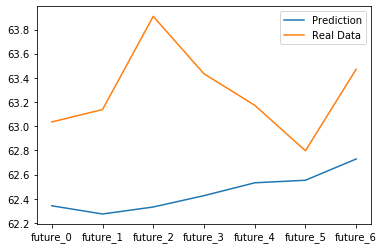

In [20]:
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.8240205986241226

## Neural Networks

In [23]:
from sklearn.neural_network import MLPRegressor

In [24]:
MLP = MLPRegressor(max_iter=180, hidden_layer_sizes=(100,100,100), random_state = 42, solver = "lbfgs")

In [25]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=180, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
MLP.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=180, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

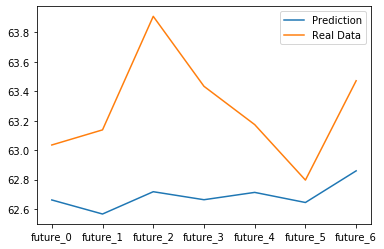

In [27]:
prediction = MLP.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [28]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.5897166534736625

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RFR = RandomForestRegressor(n_estimators = 1000, max_depth = 10)

In [31]:
RFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
RFR.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

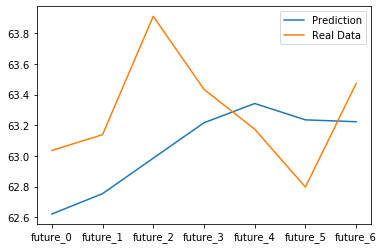

In [33]:
prediction = RFR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [34]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.3990054901531366

## KNN Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
KNN = KNeighborsRegressor(n_neighbors = 1)

In [37]:
KNN.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

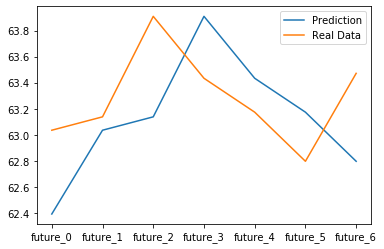

In [38]:
prediction = KNN.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [39]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.47162857142857256

## Домашнее задание:

## 1. Gaussian Regression

In [350]:
# Пробуем применить Gaussian Regression из-за красивого названия <3 
# Хорошего результата удалось достичь через "оптимизацию" normalize_y

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [41]:
GR = GaussianProcessRegressor(random_state = 42, normalize_y = True)

In [42]:
GR.fit(X,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=42)

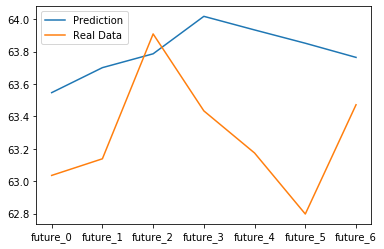

In [43]:
prediction = GR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [44]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.5550554569081052

## 2. Kernel ridge regression

In [45]:
from sklearn.kernel_ridge import KernelRidge

In [46]:
KR = KernelRidge(alpha = 170) # Другие параметры не дают эффекта, кроме kernel, с которым беда-беда

In [47]:
KR.fit(X,y)

KernelRidge(alpha=170, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

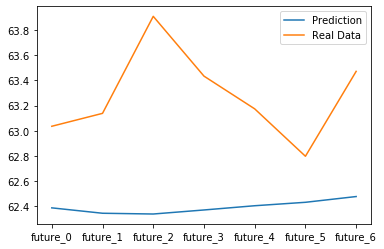

In [48]:
prediction = KR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [49]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.8863486597813933

## 3. Decision Tree Regressor

In [50]:
# В отличие от предыдущей регрессию, эту удалось хорошо оптимизировать, задав в max_leaf_nodes величину, близкую к количеству значений курса за год (246),
# а также оптимизировав параметр criterion, измеряющий качество разделения.

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
DTR = DecisionTreeRegressor(random_state = 42, max_leaf_nodes = 246, criterion = "mae")

In [53]:
DTR.fit(X,y)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=246, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

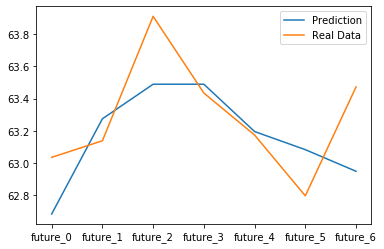

In [54]:
prediction = DTR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [55]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.25592857142857234

## 4. Extra

In [89]:
from sklearn.ensemble import ExtraTreesRegressor

In [130]:
ETR = ExtraTreesRegressor(random_state = 42, n_estimators = 10, max_features = 9)

In [131]:
ETR.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features=9, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)

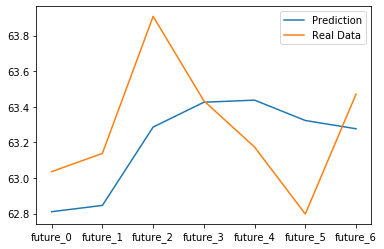

In [132]:
prediction = ETR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [133]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.30469000000000285